In [1]:
from google.colab import drive 
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
#a = []
#while(1):
#    a.append("1")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
train=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/train_Wc8LBpr.csv")
test=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
print(train.shape)
print(test.shape)

(131662, 14)
(87395, 13)


In [0]:
train['train/test']=1
test['train/test']=0

In [0]:
df1=pd.concat([train,test],axis=0)
df=df1.drop(columns=['Trip_ID'],axis=1)

In [6]:
print(df.shape)

(219057, 14)


In [7]:
df.head()

Trip_Distance Type_of_Cab  ...  Surge_Pricing_Type  train/test
0           6.77           B  ...                 2.0           1
1          29.47           B  ...                 2.0           1
2          41.58         NaN  ...                 2.0           1
3          61.56           C  ...                 3.0           1
4          54.95           C  ...                 2.0           1

[5 rows x 14 columns]

In [8]:
df.tail()

Trip_Distance Type_of_Cab  ...  Surge_Pricing_Type  train/test
87390          29.43           C  ...                 NaN           0
87391          14.83           C  ...                 NaN           0
87392          37.86           A  ...                 NaN           0
87393          10.63           C  ...                 NaN           0
87394          37.96           B  ...                 NaN           0

[5 rows x 14 columns]

#checking data type

In [9]:
df.columns

Index(['Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type', 'train/test'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219057 entries, 0 to 87394
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_Distance                219057 non-null  float64
 1   Type_of_Cab                  185689 non-null  object 
 2   Customer_Since_Months        209171 non-null  float64
 3   Life_Style_Index             185537 non-null  float64
 4   Confidence_Life_Style_Index  185537 non-null  object 
 5   Destination_Type             219057 non-null  object 
 6   Customer_Rating              219057 non-null  float64
 7   Cancellation_Last_1Month     219057 non-null  int64  
 8   Var1                         101238 non-null  float64
 9   Var2                         219057 non-null  int64  
 10  Var3                         219057 non-null  int64  
 11  Gender                       219057 non-null  object 
 12  Surge_Pricing_Type           131662 non-null  float64
 13  

#checking Missing Values

In [11]:
df.isnull().sum()*100/df.shape[0]

Trip_Distance                   0.000000
Type_of_Cab                    15.232565
Customer_Since_Months           4.512981
Life_Style_Index               15.301953
Confidence_Life_Style_Index    15.301953
Destination_Type                0.000000
Customer_Rating                 0.000000
Cancellation_Last_1Month        0.000000
Var1                           53.784631
Var2                            0.000000
Var3                            0.000000
Gender                          0.000000
Surge_Pricing_Type             39.896009
train/test                      0.000000
dtype: float64

In [12]:
for i in df.columns:
  print(i)
  print(df[i].dtypes)
  print("percentage missing values is : ",df[i].isnull().sum()*100/df.shape[0] , "%" )
  print(df[i].nunique())
  print()

Trip_Distance
float64
percentage missing values is :  0.0 %
10594

Type_of_Cab
object
percentage missing values is :  15.232565040149368 %
5

Customer_Since_Months
float64
percentage missing values is :  4.5129806397421675 %
11

Life_Style_Index
float64
percentage missing values is :  15.301953372866423 %
69677

Confidence_Life_Style_Index
object
percentage missing values is :  15.301953372866423 %
3

Destination_Type
object
percentage missing values is :  0.0 %
14

Customer_Rating
float64
percentage missing values is :  0.0 %
3976

Cancellation_Last_1Month
int64
percentage missing values is :  0.0 %
9

Var1
float64
percentage missing values is :  53.78463139730755 %
130

Var2
int64
percentage missing values is :  0.0 %
61

Var3
int64
percentage missing values is :  0.0 %
102

Gender
object
percentage missing values is :  0.0 %
2

Surge_Pricing_Type
float64
percentage missing values is :  39.8960088013622 %
3

train/test
int64
percentage missing values is :  0.0 %
2



###actions on missing value:
1) missing value in continous variables can be imputed by median
2) missing value in categorical features will be flagged separately.

#changing datatype of "Customer_Since_Months" & "Cancellation_Last_1Month" to categorical from numerical

In [0]:
df['Customer_Since_Months']=df['Customer_Since_Months'].astype("object")
df['Cancellation_Last_1Month']=df['Cancellation_Last_1Month'].astype("object")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219057 entries, 0 to 87394
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_Distance                219057 non-null  float64
 1   Type_of_Cab                  185689 non-null  object 
 2   Customer_Since_Months        209171 non-null  object 
 3   Life_Style_Index             185537 non-null  float64
 4   Confidence_Life_Style_Index  185537 non-null  object 
 5   Destination_Type             219057 non-null  object 
 6   Customer_Rating              219057 non-null  float64
 7   Cancellation_Last_1Month     219057 non-null  object 
 8   Var1                         101238 non-null  float64
 9   Var2                         219057 non-null  int64  
 10  Var3                         219057 non-null  int64  
 11  Gender                       219057 non-null  object 
 12  Surge_Pricing_Type           131662 non-null  float64
 13  

In [15]:
df.isnull().sum()*100/df.shape[0]

Trip_Distance                   0.000000
Type_of_Cab                    15.232565
Customer_Since_Months           4.512981
Life_Style_Index               15.301953
Confidence_Life_Style_Index    15.301953
Destination_Type                0.000000
Customer_Rating                 0.000000
Cancellation_Last_1Month        0.000000
Var1                           53.784631
Var2                            0.000000
Var3                            0.000000
Gender                          0.000000
Surge_Pricing_Type             39.896009
train/test                      0.000000
dtype: float64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219057 entries, 0 to 87394
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_Distance                219057 non-null  float64
 1   Type_of_Cab                  185689 non-null  object 
 2   Customer_Since_Months        209171 non-null  object 
 3   Life_Style_Index             185537 non-null  float64
 4   Confidence_Life_Style_Index  185537 non-null  object 
 5   Destination_Type             219057 non-null  object 
 6   Customer_Rating              219057 non-null  float64
 7   Cancellation_Last_1Month     219057 non-null  object 
 8   Var1                         101238 non-null  float64
 9   Var2                         219057 non-null  int64  
 10  Var3                         219057 non-null  int64  
 11  Gender                       219057 non-null  object 
 12  Surge_Pricing_Type           131662 non-null  float64
 13  

#imputing categorical columns

In [0]:
df['Type_of_Cab']=df['Type_of_Cab'].fillna("missing_type")
df['Customer_Since_Months']=df['Customer_Since_Months'].fillna(-1)
df['Confidence_Life_Style_Index']=df['Confidence_Life_Style_Index'].fillna("miss_Confidence_Life_Style_Index")
df['Customer_Since_Months']=df['Customer_Since_Months'].fillna("miss_customer_since_months")

#imputing numerical columns

In [18]:
df['Life_Style_Index'].nunique()

69677

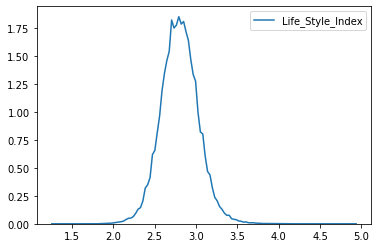

In [19]:
sns.kdeplot(df['Life_Style_Index'])
plt.show()

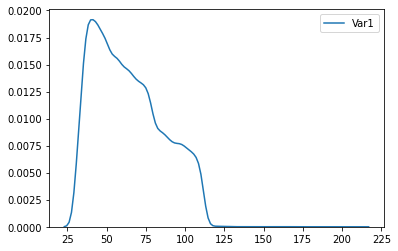

In [20]:
sns.kdeplot(df['Var1'])
plt.show()

###inference:
1)as the distribution is normally distributed, we are imputing the missing value using median so that effect of outlier (if any ?) will be negligible.
2) var 1 is right skewed. we have to transform this variable.

In [0]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="median")
x=df['Life_Style_Index'].values.reshape(-1,1)
df['Life_Style_Index']=imputer.fit_transform(x)



In [0]:
from sklearn.impute import SimpleImputer
imputer1=SimpleImputer(missing_values=np.nan,strategy="median")
x1=df['Var1'].values.reshape(-1,1)
df['Var1']=imputer1.fit_transform(x1)

#data frame before, dummy/label encoding = df

In [23]:
df.shape

(219057, 14)

#label encoding/ dummies

In [24]:
cat_cols=df.select_dtypes(include="object").columns
cat_cols

Index(['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Cancellation_Last_1Month', 'Gender'],
      dtype='object')

In [25]:
for i in cat_cols:
  print(i)
  print(df[i].nunique())
  print(df[i].value_counts(normalize=True)*100)
  print()

Type_of_Cab
6
B               23.548665
C               21.333260
A               16.378386
missing_type    15.232565
D               14.555572
E                8.951551
Name: Type_of_Cab, dtype: float64

Confidence_Life_Style_Index
4
B                                   30.706620
C                                   27.269615
A                                   26.721812
miss_Confidence_Life_Style_Index    15.301953
Name: Confidence_Life_Style_Index, dtype: float64

Destination_Type
14
A    58.893347
B    22.456712
C     5.659258
D     5.060327
E     2.076628
F     1.470850
G     1.147190
H     0.969611
I     0.608974
J     0.532282
K     0.503065
L     0.480240
M     0.073040
N     0.068475
Name: Destination_Type, dtype: float64

Cancellation_Last_1Month
9
0    52.138028
1    27.982215
2    12.360710
3     5.420963
4     1.393701
5     0.493479
6     0.197209
7     0.010043
8     0.003652
Name: Cancellation_Last_1Month, dtype: float64

Gender
2
Male      71.272774
Female    28.727226
N

In [0]:
dummy_variables=['Type_of_Cab','Customer_Since_Months','Confidence_Life_Style_Index','Destination_Type','Gender','Cancellation_Last_1Month']
df1=pd.get_dummies(data=df,columns=dummy_variables,drop_first=True)

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219057 entries, 0 to 87394
Data columns (total 49 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   Trip_Distance                                                 219057 non-null  float64
 1   Life_Style_Index                                              219057 non-null  float64
 2   Customer_Rating                                               219057 non-null  float64
 3   Var1                                                          219057 non-null  float64
 4   Var2                                                          219057 non-null  int64  
 5   Var3                                                          219057 non-null  int64  
 6   Surge_Pricing_Type                                            131662 non-null  float64
 7   train/test                                               

#predictive Power Score

In [27]:
df_pps=df.copy()
df_pps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219057 entries, 0 to 87394
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_Distance                219057 non-null  float64
 1   Type_of_Cab                  219057 non-null  object 
 2   Customer_Since_Months        219057 non-null  float64
 3   Life_Style_Index             219057 non-null  float64
 4   Confidence_Life_Style_Index  219057 non-null  object 
 5   Destination_Type             219057 non-null  object 
 6   Customer_Rating              219057 non-null  float64
 7   Cancellation_Last_1Month     219057 non-null  object 
 8   Var1                         219057 non-null  float64
 9   Var2                         219057 non-null  int64  
 10  Var3                         219057 non-null  int64  
 11  Gender                       219057 non-null  object 
 12  Surge_Pricing_Type           131662 non-null  float64
 13  

In [0]:
lab_enc=df_pps[['Type_of_Cab','Customer_Since_Months','Confidence_Life_Style_Index','Destination_Type','Cancellation_Last_1Month','Gender']]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_pps['Customer_Since_Months']=le.fit_transform(df_pps['Customer_Since_Months'])
df_pps['Confidence_Life_Style_Index']=le.fit_transform(df_pps['Confidence_Life_Style_Index'])
df_pps['Destination_Type']=le.fit_transform(df_pps['Destination_Type'])
df_pps['Cancellation_Last_1Month']=le.fit_transform(df_pps['Cancellation_Last_1Month'])
df_pps['Gender']=le.fit_transform(df_pps['Gender'])
df_pps['Type_of_Cab']=le.fit_transform(df_pps['Type_of_Cab'])

In [29]:
df_pps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219057 entries, 0 to 87394
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_Distance                219057 non-null  float64
 1   Type_of_Cab                  219057 non-null  int64  
 2   Customer_Since_Months        219057 non-null  int64  
 3   Life_Style_Index             219057 non-null  float64
 4   Confidence_Life_Style_Index  219057 non-null  int64  
 5   Destination_Type             219057 non-null  int64  
 6   Customer_Rating              219057 non-null  float64
 7   Cancellation_Last_1Month     219057 non-null  int64  
 8   Var1                         219057 non-null  float64
 9   Var2                         219057 non-null  int64  
 10  Var3                         219057 non-null  int64  
 11  Gender                       219057 non-null  int64  
 12  Surge_Pricing_Type           131662 non-null  float64
 13  

In [30]:
pip install ppscore

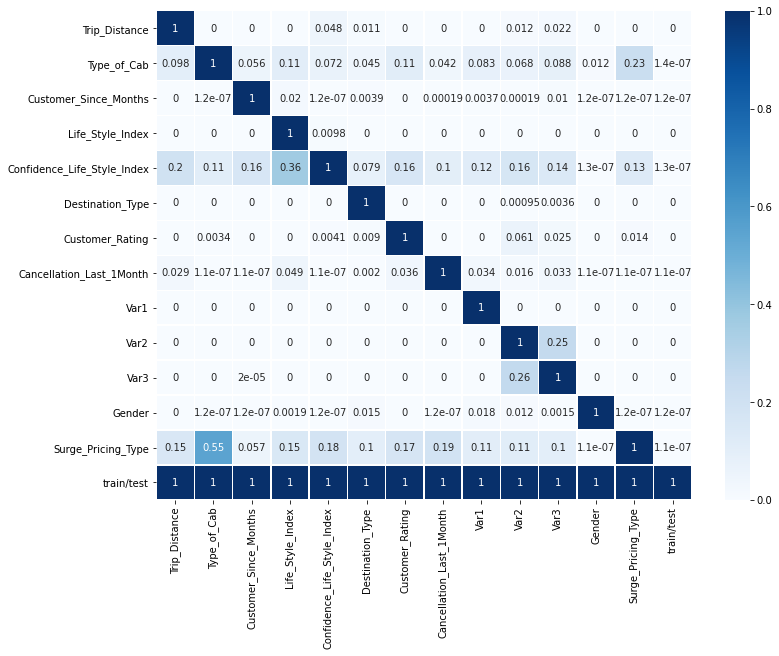

In [31]:
train_pps=df_pps[df_pps['train/test']==1]
test_pps=df_pps[df_pps['train/test']==0]
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import ppscore as pps
df_matrix = pps.matrix(train_pps)
plt.figure(figsize=(12,9))
sns.heatmap(df_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
import warnings
warnings.filterwarnings('ignore')


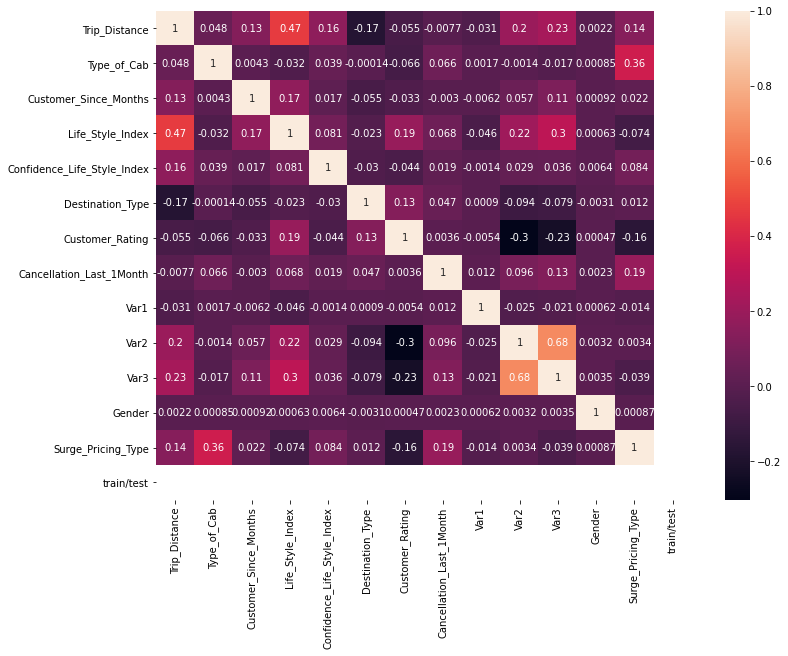

In [32]:
plt.figure(figsize=(12,9))
sns.heatmap(train_pps.corr(),annot=True)
plt.show()

#inference:

* 1) feature "type_of_cab" is a good predictor of the target variable
* 2) "life_style_index" can predict "confidence_life)style_index".
* 3) trip_distance and life_style_index have high correlation value. descent pps score. (possibility of feature engineering)
* 4) high correlation value between var2 and var 3. (possibility of feature engineering)







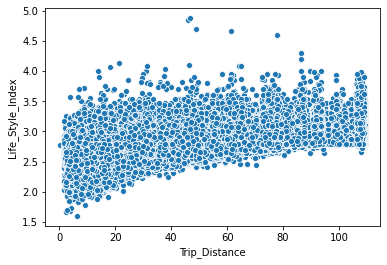

In [33]:
sns.scatterplot(x='Trip_Distance',y='Life_Style_Index',data=train_pps)
plt.show()

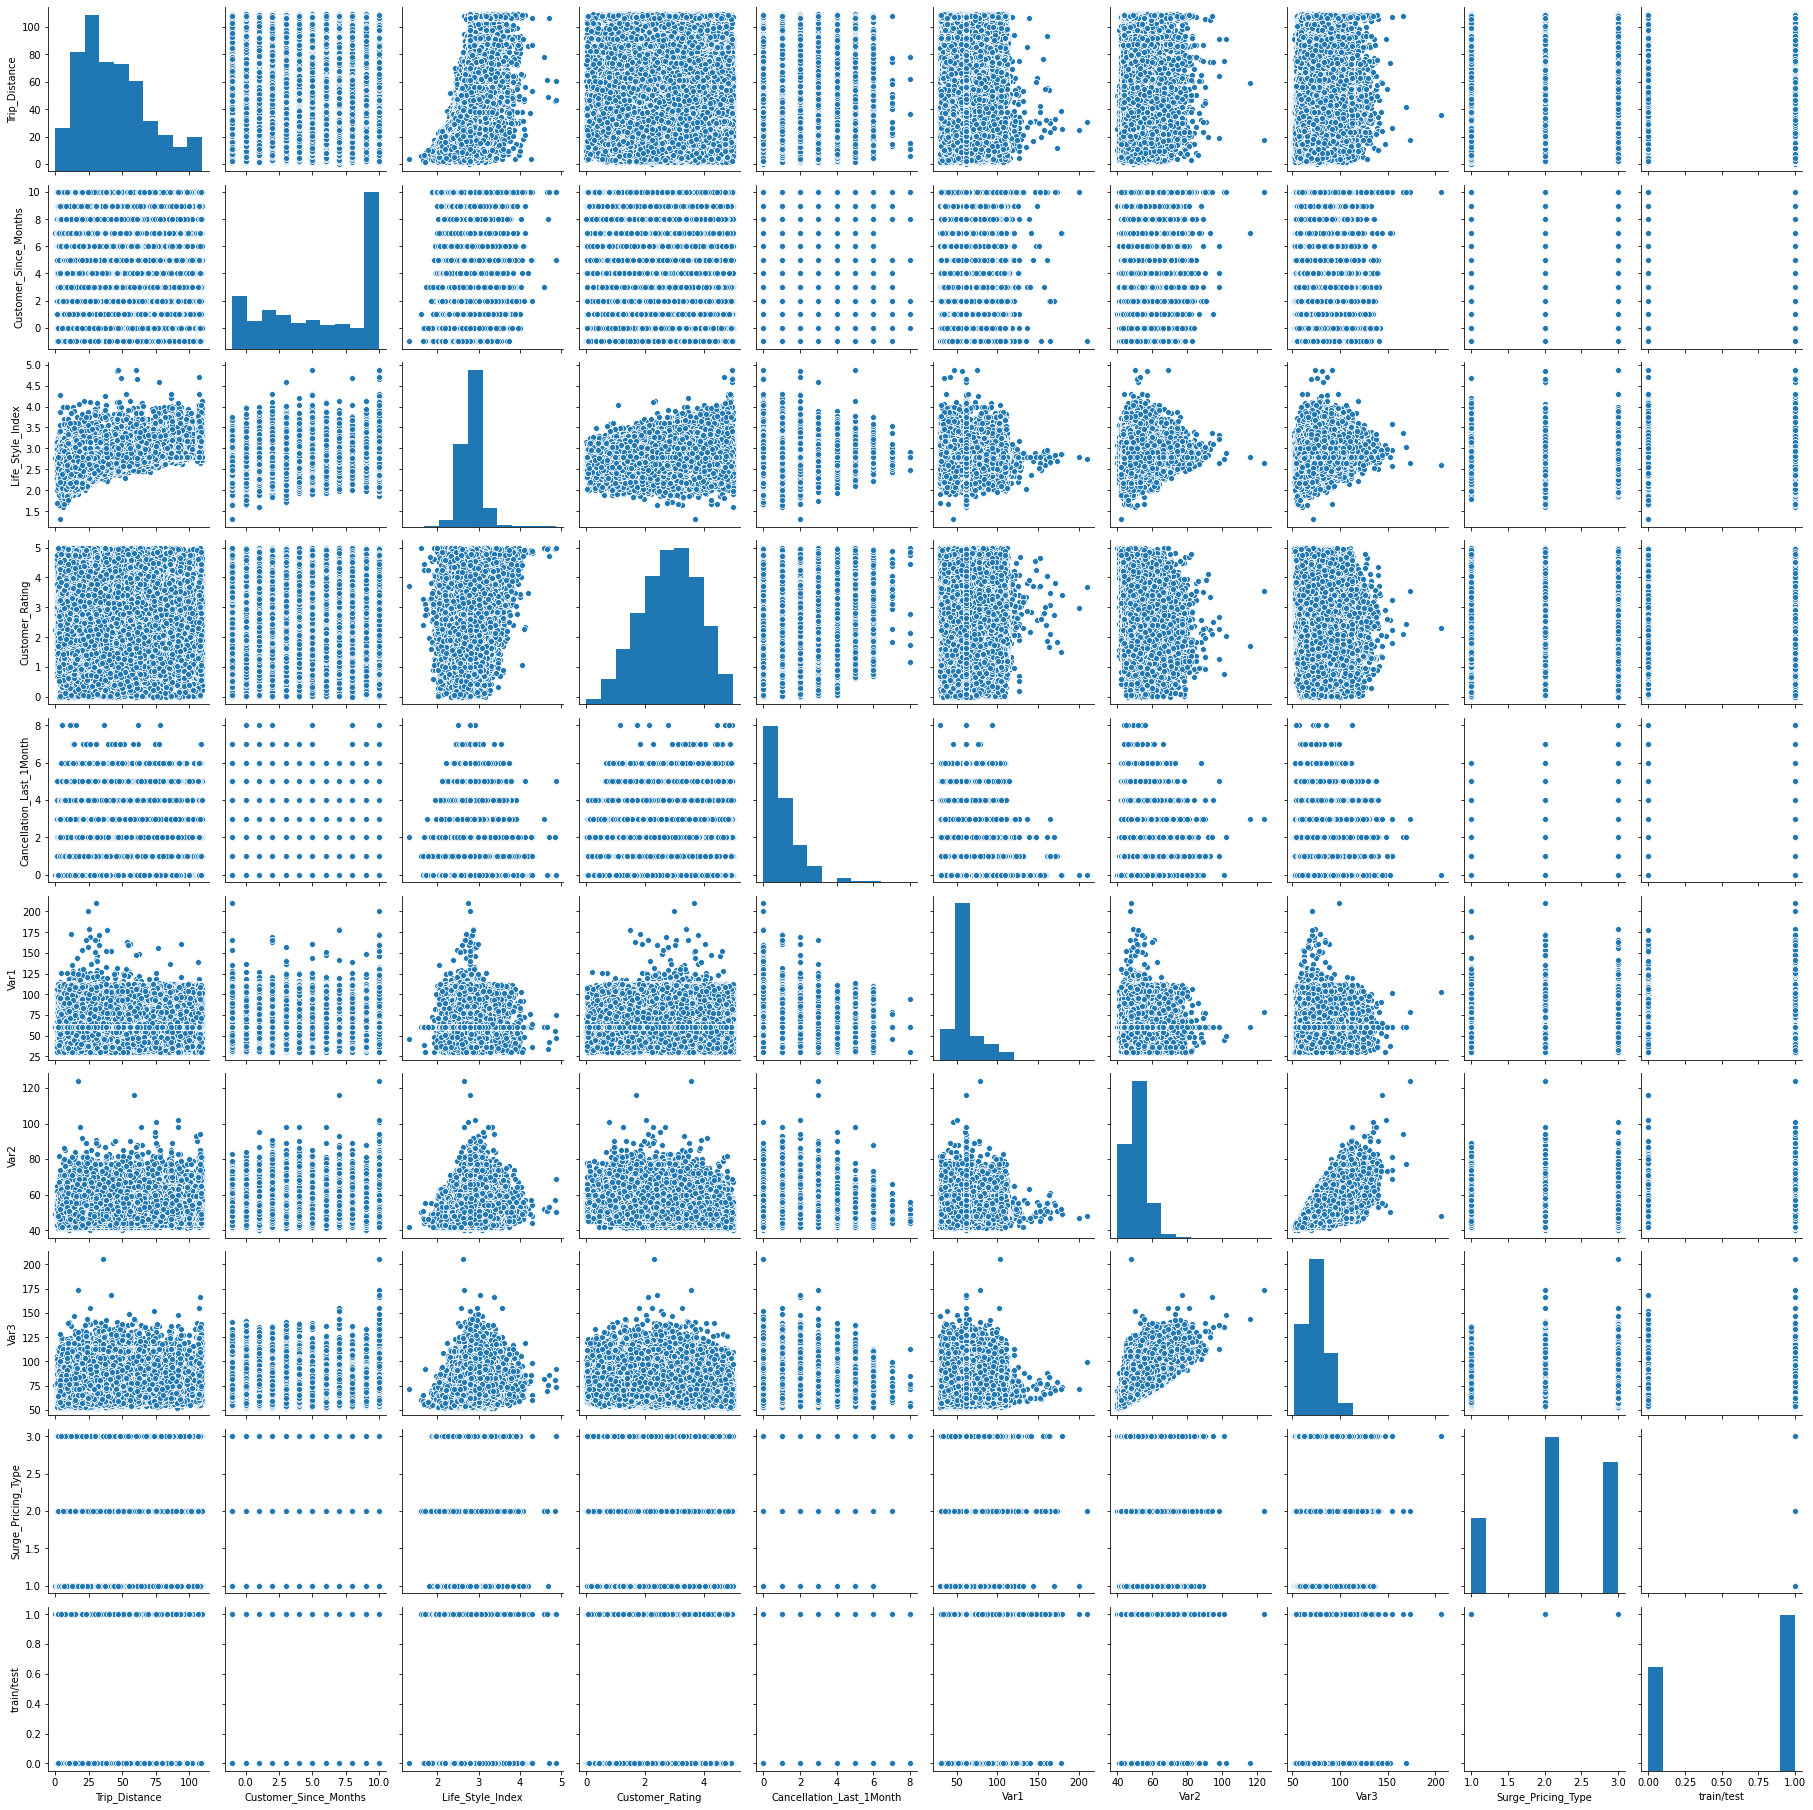

In [34]:
sns.pairplot(df)
plt.show()

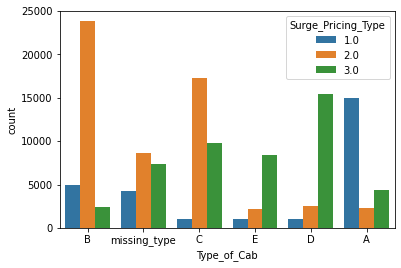

In [35]:
sns.countplot(df['Type_of_Cab'],hue=df['Surge_Pricing_Type'])
plt.show()

#Base Model

In [36]:
train=df1[df1['train/test']==1]
test=df1[df1['train/test']==0]
y=train['Surge_Pricing_Type']
x=train.drop(columns=['Surge_Pricing_Type',"train/test"])
x_test=test.drop(columns=["train/test",'Surge_Pricing_Type'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (131662, 47)
y_train shape is  (131662,)
x_test shape is  (87395, 47)


lr:0.659218 (0.000029)
knn:0.459107 (0.000038)
rf:0.694285 (0.000012)
nb:0.494524 (0.000031)
rf_boost:0.692683 (0.000013)
gboost:0.698235 (0.000014)


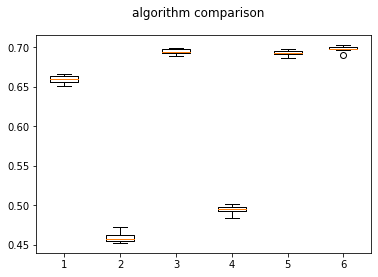

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

results=[]
names=[]
models=[]
lr=LogisticRegression()
knn=KNeighborsClassifier()
#svm=SVC(probability=True)
rf=RandomForestClassifier()
nb=GaussianNB()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()

models.append(('lr',lr))
models.append(('knn',knn))
#models.append(('svm',svm))
models.append(('rf',rf))
models.append(('nb',nb))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))

for name,model in models:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x,y,cv=kfold,scoring='accuracy') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

In [53]:
from catboost import CatBoostClassifier
cbc=CatBoostClassifier()
model=cbc.fit(x,y)

Learning rate set to 0.101488
0:	learn: 1.0362357	total: 68.3ms	remaining: 1m 8s
1:	learn: 0.9880882	total: 133ms	remaining: 1m 6s
2:	learn: 0.9499967	total: 198ms	remaining: 1m 5s
3:	learn: 0.9202396	total: 259ms	remaining: 1m 4s
4:	learn: 0.8951280	total: 320ms	remaining: 1m 3s
5:	learn: 0.8740728	total: 383ms	remaining: 1m 3s
6:	learn: 0.8565399	total: 448ms	remaining: 1m 3s
7:	learn: 0.8425550	total: 510ms	remaining: 1m 3s
8:	learn: 0.8302063	total: 572ms	remaining: 1m 2s
9:	learn: 0.8198056	total: 639ms	remaining: 1m 3s
10:	learn: 0.8108517	total: 712ms	remaining: 1m 4s
11:	learn: 0.8030160	total: 775ms	remaining: 1m 3s
12:	learn: 0.7966909	total: 839ms	remaining: 1m 3s
13:	learn: 0.7907919	total: 903ms	remaining: 1m 3s
14:	learn: 0.7865067	total: 978ms	remaining: 1m 4s
15:	learn: 0.7818568	total: 1.04s	remaining: 1m 4s
16:	learn: 0.7783405	total: 1.12s	remaining: 1m 4s
17:	learn: 0.7742050	total: 1.18s	remaining: 1m 4s
18:	learn: 0.7704648	total: 1.24s	remaining: 1m 4s
19:	learn:

In [39]:
for name,algo in models:
    print(algo)
    model=algo.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_stat

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=lr.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/lr_base.csv')

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=knn.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/knn_base.csv')

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=rf.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/rf_base.csv')

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=nb.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/nb_base.csv')

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=rf_boost.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/rfboost_base.csv')

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=gboost.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/gboost_base.csv')

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=cbc.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/cbc_base.csv')

In [51]:
pip install catboost

     |████████████████████████████████| 64.7MB 48kB/s 


#feature selection on base model

In [82]:
imp=pd.DataFrame(cbc.feature_importances_,index=x.columns,columns=['sign'])

sign_df=imp.sort_values(by="sign",ascending=False)
sign_df1=sign_df.reset_index()
sign_df_final=sign_df1[sign_df1['sign']>0.2]
sign_df_final

index       sign
0                                       Type_of_Cab_C  18.097406
1                                       Type_of_Cab_B  14.302660
2                                       Type_of_Cab_D  11.090589
3                                       Trip_Distance   7.416048
4                                       Type_of_Cab_E   6.293189
5                            Type_of_Cab_missing_type   5.779062
6                                     Customer_Rating   5.213322
7                                                Var1   4.825533
8                                    Life_Style_Index   4.609189
9                                                Var3   4.555116
10                                               Var2   2.438509
11                      Confidence_Life_Style_Index_B   2.410880
12                         Cancellation_Last_1Month_2   1.803248
13                                 Destination_Type_B   1.742646
14                         Cancellation_Last_1Month_1   1.563382
15                         Cancellation_Last_1Month_3   1.325997
16                      Confidence_Life_Style_Index_C   1.227129
17                                 Destination_Type_D   0.870484
18  Confidence_Life_Style_Index_miss_Confidence_Li...   0.484350
19                         Cancellation_Last_1Month_4   0.476219
20                                        Gender_Male   0.379046
21                         Customer_Since_Months_10.0   0.326254
22                                 Destination_Type_F   0.273696

In [83]:
list_cols=list(sign_df_final['index'])
list_cols.append('train/test')
list_cols.append('Surge_Pricing_Type')
print(len(list_cols))

25


In [84]:
df_fs=df1[list_cols]
print(df_fs.shape)

(219057, 25)


In [85]:
train=df_fs[df_fs['train/test']==1]
test=df_fs[df_fs['train/test']==0]
y=train['Surge_Pricing_Type']
x=train.drop(columns=['Surge_Pricing_Type',"train/test"])
x_test=test.drop(columns=["train/test",'Surge_Pricing_Type'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (131662, 23)
y_train shape is  (131662,)
x_test shape is  (87395, 23)


Streaming output truncated to the last 5000 lines.
6:	learn: 0.8568834	total: 407ms	remaining: 57.8s
7:	learn: 0.8423433	total: 466ms	remaining: 57.8s
8:	learn: 0.8301709	total: 521ms	remaining: 57.4s
9:	learn: 0.8200263	total: 577ms	remaining: 57.1s
10:	learn: 0.8113254	total: 632ms	remaining: 56.8s
11:	learn: 0.8043926	total: 702ms	remaining: 57.8s
12:	learn: 0.7978669	total: 758ms	remaining: 57.6s
13:	learn: 0.7921469	total: 814ms	remaining: 57.4s
14:	learn: 0.7879009	total: 870ms	remaining: 57.1s
15:	learn: 0.7832318	total: 928ms	remaining: 57.1s
16:	learn: 0.7797115	total: 996ms	remaining: 57.6s
17:	learn: 0.7757656	total: 1.06s	remaining: 58.1s
18:	learn: 0.7721902	total: 1.12s	remaining: 58s
19:	learn: 0.7689200	total: 1.18s	remaining: 58s
20:	learn: 0.7659807	total: 1.24s	remaining: 57.8s
21:	learn: 0.7633361	total: 1.3s	remaining: 57.6s
22:	learn: 0.7606643	total: 1.35s	remaining: 57.4s
23:	learn: 0.7582450	total: 1.42s	remaining: 57.7s
24:	learn: 0.7559484	total: 1.48s	remain

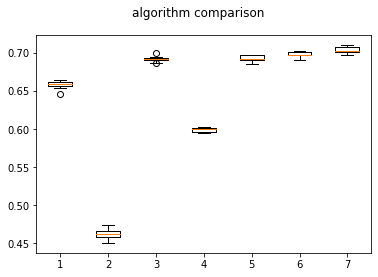

In [86]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier



results=[]
names=[]
models=[]
lr=LogisticRegression()
knn=KNeighborsClassifier()
#svm=SVC(probability=True)
rf=RandomForestClassifier()
nb=GaussianNB()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()
cbc=CatBoostClassifier()

models.append(('lr',lr))
models.append(('knn',knn))
#models.append(('svm',svm))
models.append(('rf',rf))
models.append(('nb',nb))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))  

for name,model in models:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x,y,cv=kfold,scoring='accuracy') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

In [87]:
for name,algo in models:
    print(algo)
    model=algo.fit(x,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_stat

In [0]:


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=lr.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/lr_base_fs2.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=knn.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/knn_base_fs2.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=rf.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/rf_base_fs2.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=nb.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/nb_base_fs2.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=rf_boost.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/rfboost_base_fs2.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=gboost.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/gboost_base_fs2.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=cbc.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/cbc_base_fs2.csv')

#feature engineering

In [0]:
df_fe=df1.copy()

In [0]:
df_fe['var_23combined']=(df_fe['Var2']+df_fe['Var3'])/2

In [32]:
df_fe.head()

Trip_Distance  Life_Style_Index  ...  Cancellation_Last_1Month_8  var_23combined
0           6.77           2.42769  ...                           0            53.0
1          29.47           2.78245  ...                           0            67.0
2          41.58           2.79828  ...                           0            66.5
3          61.56           2.79828  ...                           0            63.0
4          54.95           3.03453  ...                           0            75.5

[5 rows x 50 columns]

In [33]:
train=df_fe[df_fe['train/test']==1]
test=df_fe[df_fe['train/test']==0]
y=train['Surge_Pricing_Type']
x=train.drop(columns=['Surge_Pricing_Type',"train/test","Var2","Var3"])
x_test=test.drop(columns=["train/test",'Surge_Pricing_Type',"Var2","Var3"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (131662, 46)
y_train shape is  (131662,)
x_test shape is  (87395, 46)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Streaming output truncated to the last 5000 lines.
6:	learn: 0.8563791	total: 418ms	remaining: 59.3s
7:	learn: 0.8417634	total: 476ms	remaining: 59.1s
8:	learn: 0.8300253	total: 534ms	remaining: 58.8s
9:	learn: 0.8193767	total: 594ms	remaining: 58.8s
10:	learn: 0.8103435	total: 655ms	remaining: 58.9s
11:	learn: 0.8029017	total: 713ms	remaining: 58.7s
12:	learn: 0.7967795	total: 780ms	remaining: 59.2s
13:	learn: 0.7911416	total: 843ms	remaining: 59.4s
14:	learn: 0.7862297	total: 906ms	remaining: 59.5s
15:	learn: 0.7816548	total: 963ms	remaining: 59.2s
16:	learn: 0.7778257	total: 1.03s	remaining: 59.4s
17:	learn: 0.7745673	total: 1.09s	remaining: 59.3s
18:	learn: 0.7711230	total: 1.15s	remaining: 59.5s
19:	learn: 0.7683429	total: 1.21s	remaining: 59.4s
20:	learn: 0.7654531	total: 1.27s	remaining: 59.2s
21:	learn: 0.7628836	total: 1.33s	remaining: 59.1s
22:	learn: 0.7603698	total: 1.39s	remaining: 59.2s
23:	learn: 0.7583483	total: 1.45s	remaining: 59s
24:	learn: 0.7560621	total: 1.52s	rem

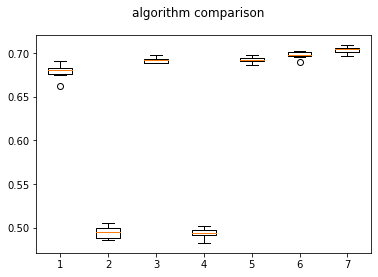

In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier



results=[]
names=[]
models=[]
lr=LogisticRegression()
knn=KNeighborsClassifier()
#svm=SVC(probability=True)
rf=RandomForestClassifier()
nb=GaussianNB()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()
cbc=CatBoostClassifier()

models.append(('lr',lr))
models.append(('knn',knn))
#models.append(('svm',svm))
models.append(('rf',rf))
models.append(('nb',nb))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))  

for name,model in models:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x,y,cv=kfold,scoring='accuracy') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

In [37]:
for name,algo in models:
    print(algo)
    model=algo.fit(x,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
GaussianNB(priors=None, var_smoothing=1e-09)
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
       

In [0]:


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=lr.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/lr_base_fe.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=knn.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/knn_base_fe.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=rf.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/rf_base_fe.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=nb.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/nb_base_fe.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=rf_boost.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/rfboost_base_fe.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=gboost.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/gboost_base_fe.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=cbc.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/cbc_base_fe.csv')

# feature engineering 2

In [0]:
df_fe2=df1.copy()

In [40]:
df_fe2.head()

Trip_Distance  ...  Cancellation_Last_1Month_8
0           6.77  ...                           0
1          29.47  ...                           0
2          41.58  ...                           0
3          61.56  ...                           0
4          54.95  ...                           0

[5 rows x 49 columns]

In [0]:
df_fe2['trip+lifestyleindex']=df_fe2['Trip_Distance']*df_fe2['Life_Style_Index']

In [42]:
df_fe2.head()

Trip_Distance  ...  trip+lifestyleindex
0           6.77  ...            16.435461
1          29.47  ...            81.998801
2          41.58  ...           116.352482
3          61.56  ...           172.262117
4          54.95  ...           166.747423

[5 rows x 50 columns]

In [43]:
train=df_fe2[df_fe2['train/test']==1]
test=df_fe2[df_fe2['train/test']==0]
y=train['Surge_Pricing_Type']
x=train.drop(columns=['Surge_Pricing_Type',"train/test","Trip_Distance","Life_Style_Index"])
x_test=test.drop(columns=["train/test",'Surge_Pricing_Type',"Trip_Distance","Life_Style_Index"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (131662, 46)
y_train shape is  (131662,)
x_test shape is  (87395, 46)


Streaming output truncated to the last 5000 lines.
6:	learn: 0.8574612	total: 403ms	remaining: 57.1s
7:	learn: 0.8430687	total: 467ms	remaining: 58s
8:	learn: 0.8316554	total: 524ms	remaining: 57.7s
9:	learn: 0.8210558	total: 579ms	remaining: 57.3s
10:	learn: 0.8121438	total: 637ms	remaining: 57.2s
11:	learn: 0.8045163	total: 699ms	remaining: 57.6s
12:	learn: 0.7980625	total: 757ms	remaining: 57.5s
13:	learn: 0.7926914	total: 816ms	remaining: 57.5s
14:	learn: 0.7878165	total: 874ms	remaining: 57.4s
15:	learn: 0.7841978	total: 934ms	remaining: 57.4s
16:	learn: 0.7800435	total: 991ms	remaining: 57.3s
17:	learn: 0.7760323	total: 1.05s	remaining: 57.3s
18:	learn: 0.7729505	total: 1.11s	remaining: 57.3s
19:	learn: 0.7698392	total: 1.17s	remaining: 57.3s
20:	learn: 0.7671232	total: 1.22s	remaining: 57s
21:	learn: 0.7644531	total: 1.28s	remaining: 56.9s
22:	learn: 0.7620561	total: 1.33s	remaining: 56.7s
23:	learn: 0.7597631	total: 1.39s	remaining: 56.7s
24:	learn: 0.7576246	total: 1.46s	remai

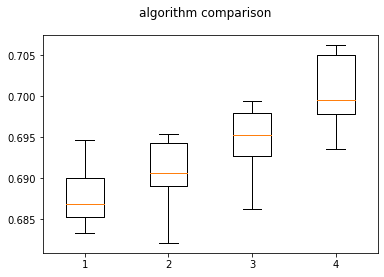

In [44]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier



results=[]
names=[]
models=[]
#lr=LogisticRegression()
#knn=KNeighborsClassifier()
#svm=SVC(probability=True)
rf=RandomForestClassifier()
#nb=GaussianNB()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()
cbc=CatBoostClassifier()

#models.append(('lr',lr))
#models.append(('knn',knn))
#models.append(('svm',svm))
models.append(('rf',rf))
#models.append(('nb',nb))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))  

for name,model in models:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x,y,cv=kfold,scoring='accuracy') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

In [45]:
for name,algo in models:
    print(algo)
    model=algo.fit(x,y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                 

In [0]:



id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=rf.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/rf_base_fe2.csv')



id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=rf_boost.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/rfboost_base_fe2.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=gboost.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/gboost_base_fe2.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=cbc.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/cbc_base_fe2.csv')

# feature engineering - binning

In [0]:
df_bin=df.copy()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219057 entries, 0 to 87394
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_Distance                219057 non-null  float64
 1   Type_of_Cab                  219057 non-null  object 
 2   Customer_Since_Months        219057 non-null  float64
 3   Life_Style_Index             219057 non-null  float64
 4   Confidence_Life_Style_Index  219057 non-null  object 
 5   Destination_Type             219057 non-null  object 
 6   Customer_Rating              219057 non-null  float64
 7   Cancellation_Last_1Month     219057 non-null  object 
 8   Var1                         219057 non-null  float64
 9   Var2                         219057 non-null  int64  
 10  Var3                         219057 non-null  int64  
 11  Gender                       219057 non-null  object 
 12  Surge_Pricing_Type           131662 non-null  float64
 13  

In [31]:
cat_cols=df.select_dtypes(include="object")
for i in cat_cols:
  print(i)
  print(df[i].nunique())
  print(df[i].value_counts(normalize=True)*100)
  print()

Type_of_Cab
6
B               23.548665
C               21.333260
A               16.378386
missing_type    15.232565
D               14.555572
E                8.951551
Name: Type_of_Cab, dtype: float64

Confidence_Life_Style_Index
4
B                                   30.706620
C                                   27.269615
A                                   26.721812
miss_Confidence_Life_Style_Index    15.301953
Name: Confidence_Life_Style_Index, dtype: float64

Destination_Type
14
A    58.893347
B    22.456712
C     5.659258
D     5.060327
E     2.076628
F     1.470850
G     1.147190
H     0.969611
I     0.608974
J     0.532282
K     0.503065
L     0.480240
M     0.073040
N     0.068475
Name: Destination_Type, dtype: float64

Cancellation_Last_1Month
9
0    52.138028
1    27.982215
2    12.360710
3     5.420963
4     1.393701
5     0.493479
6     0.197209
7     0.010043
8     0.003652
Name: Cancellation_Last_1Month, dtype: float64

Gender
2
Male      71.272774
Female    28.727226
N

In [0]:
destination_type_df=df_bin['Destination_Type'].value_counts(normalize=True)*100
small=destination_type_df[destination_type_df<1].index
df_bin['destination_type_new']=df_bin['Destination_Type'].replace(small,"other")

In [0]:
dummy_variables=['Type_of_Cab','Customer_Since_Months','Confidence_Life_Style_Index','destination_type_new','Gender','Cancellation_Last_1Month']
df1_fe=pd.get_dummies(data=df_bin,columns=dummy_variables,drop_first=True)

In [40]:
train=df1_fe[df1_fe['train/test']==1]
test=df1_fe[df1_fe['train/test']==0]
y=train['Surge_Pricing_Type']
x=train.drop(columns=['Surge_Pricing_Type',"train/test","Destination_Type"])
x_test=test.drop(columns=["train/test",'Surge_Pricing_Type',"Destination_Type"])


print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (131662, 41)
y_train shape is  (131662,)
x_test shape is  (87395, 41)


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

rf=RandomForestClassifier()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()
cbc=CatBoostClassifier()


models=[]


models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

results=[]
names=[]
count=0
output_result=pd.DataFrame(columns=['Description','accuracy-train'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    y_prob_train=model.predict_proba(x)[:,1]
    y_pred_test=model.predict(x_test)
    y_prob_test=model.predict_proba(x_test)[:,1]

    from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
    import sklearn.metrics as mt
    accuracy_train=accuracy_score(y,y_pred_train)
    #accuracy_test=accuracy_score(y_test,y_pred_test)
    #auc_train=roc_auc_score(y_train_sen,y_prob_train)
    #auc_test=roc_auc_score(y_test,y_prob_test)
    #recall_train=mt.recall_score(y_train_sen,y_pred_train)
    #recall_test=mt.recall_score(y_test,y_pred_test)
    #f1_train=mt.f1_score(y_train_sen,y_pred_train)
    #f1_test=mt.f1_score(y_test,y_pred_test)
    #conf_train=confusion_matrix(y_train_sen,y_pred_train)
    #conf_test=confusion_matrix(y_test,y_pred_test)
    #classf_train=classification_report(y_train_sen,y_pred_train)
    #classf_test=classification_report(y_test,y_pred_test)
    print(name.center(70,'*'))
    print('accuracy of base model-train  :  ', accuracy_train)
    #print('accuracy of base model-test :  ', accuracy_test)
    #print('AUC of base model-train  :  ', auc_train)
    #print('AUC of base model-test  :  ', auc_test)
    print()
    #print('confusion matrix-train \n',conf_train)
    print()
    #print('confusion matrix-test \n',conf_test)
    #print()
    #print('classification report-train \n',classf_train)
    #print('classification report-test \n',classf_test)

    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'accuracy-train':accuracy_train },index=[count])],axis=0)
    
print(output_result)

**********************************rf**********************************
accuracy of base model-train  :   0.999992404794094


*******************************rf_boost*******************************
accuracy of base model-train  :   0.692978991660464


********************************gboost********************************
accuracy of base model-train  :   0.7004982455074357


Learning rate set to 0.101488
0:	learn: 1.0362357	total: 122ms	remaining: 2m 1s
1:	learn: 0.9882538	total: 193ms	remaining: 1m 36s
2:	learn: 0.9501329	total: 261ms	remaining: 1m 26s
3:	learn: 0.9197755	total: 336ms	remaining: 1m 23s
4:	learn: 0.8942483	total: 406ms	remaining: 1m 20s
5:	learn: 0.8733124	total: 476ms	remaining: 1m 18s
6:	learn: 0.8558719	total: 556ms	remaining: 1m 18s
7:	learn: 0.8413917	total: 625ms	remaining: 1m 17s
8:	learn: 0.8291608	total: 692ms	remaining: 1m 16s
9:	learn: 0.8187922	total: 766ms	remaining: 1m 15s
10:	learn: 0.8100271	total: 847ms	remaining: 1m 16s
11:	learn: 0.8024093	total: 918ms

In [0]:



id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=rf.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/rf_base_fe3.csv')



id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=rf_boost.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/rfboost_base_fe3.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=gboost.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/gboost_base_fe3.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=cbc.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/cbc_base_fe3.csv')

#feature engineering binning on another categorical variable

In [0]:
df_bin1=df.copy()

In [47]:
df_bin1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219057 entries, 0 to 87394
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_Distance                219057 non-null  float64
 1   Type_of_Cab                  219057 non-null  object 
 2   Customer_Since_Months        219057 non-null  float64
 3   Life_Style_Index             219057 non-null  float64
 4   Confidence_Life_Style_Index  219057 non-null  object 
 5   Destination_Type             219057 non-null  object 
 6   Customer_Rating              219057 non-null  float64
 7   Cancellation_Last_1Month     219057 non-null  object 
 8   Var1                         219057 non-null  float64
 9   Var2                         219057 non-null  int64  
 10  Var3                         219057 non-null  int64  
 11  Gender                       219057 non-null  object 
 12  Surge_Pricing_Type           131662 non-null  float64
 13  

In [0]:
destination_type_df=df_bin1['Destination_Type'].value_counts(normalize=True)*100
small=destination_type_df[destination_type_df<1].index
df_bin1['destination_type_new']=df_bin1['Destination_Type'].replace(small,"other")

In [0]:
Cancellation_Last_1Month_df=df_bin1['Cancellation_Last_1Month'].value_counts(normalize=True)*100
small=Cancellation_Last_1Month_df[Cancellation_Last_1Month_df<2].index
df_bin1['Cancellation_Last_1Month_new']=df_bin1['Cancellation_Last_1Month'].replace(small,"other")

In [54]:
df_bin1.head()

Trip_Distance  ... Cancellation_Last_1Month_new
0           6.77  ...                            0
1          29.47  ...                            0
2          41.58  ...                            2
3          61.56  ...                            0
4          54.95  ...                        other

[5 rows x 16 columns]

In [0]:
dummy_variables=['Type_of_Cab','Customer_Since_Months','Confidence_Life_Style_Index','destination_type_new','Gender','Cancellation_Last_1Month_new']
df1_fe=pd.get_dummies(data=df_bin1,columns=dummy_variables,drop_first=True)

In [56]:
train=df1_fe[df1_fe['train/test']==1]
test=df1_fe[df1_fe['train/test']==0]
y=train['Surge_Pricing_Type']
x=train.drop(columns=['Surge_Pricing_Type',"train/test","Destination_Type","Cancellation_Last_1Month"])
x_test=test.drop(columns=["train/test",'Surge_Pricing_Type',"Destination_Type","Cancellation_Last_1Month"])


print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (131662, 37)
y_train shape is  (131662,)
x_test shape is  (87395, 37)


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

rf=RandomForestClassifier()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()
cbc=CatBoostClassifier()


models=[]


models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

results=[]
names=[]
count=0
output_result=pd.DataFrame(columns=['Description','accuracy-train'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    y_prob_train=model.predict_proba(x)[:,1]
    y_pred_test=model.predict(x_test)
    y_prob_test=model.predict_proba(x_test)[:,1]

    from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
    import sklearn.metrics as mt
    accuracy_train=accuracy_score(y,y_pred_train)
    #accuracy_test=accuracy_score(y_test,y_pred_test)
    #auc_train=roc_auc_score(y_train_sen,y_prob_train)
    #auc_test=roc_auc_score(y_test,y_prob_test)
    #recall_train=mt.recall_score(y_train_sen,y_pred_train)
    #recall_test=mt.recall_score(y_test,y_pred_test)
    #f1_train=mt.f1_score(y_train_sen,y_pred_train)
    #f1_test=mt.f1_score(y_test,y_pred_test)
    #conf_train=confusion_matrix(y_train_sen,y_pred_train)
    #conf_test=confusion_matrix(y_test,y_pred_test)
    #classf_train=classification_report(y_train_sen,y_pred_train)
    #classf_test=classification_report(y_test,y_pred_test)
    print(name.center(70,'*'))
    print('accuracy of base model-train  :  ', accuracy_train)
    #print('accuracy of base model-test :  ', accuracy_test)
    #print('AUC of base model-train  :  ', auc_train)
    #print('AUC of base model-test  :  ', auc_test)
    print()
    #print('confusion matrix-train \n',conf_train)
    print()
    #print('confusion matrix-test \n',conf_test)
    #print()
    #print('classification report-train \n',classf_train)
    #print('classification report-test \n',classf_test)

    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'accuracy-train':accuracy_train },index=[count])],axis=0)
    
print(output_result)

**********************************rf**********************************
accuracy of base model-train  :   0.9999848095881879


*******************************rf_boost*******************************
accuracy of base model-train  :   0.6931384909844905


********************************gboost********************************
accuracy of base model-train  :   0.7013640989807234


Learning rate set to 0.101488
0:	learn: 1.0370986	total: 74.1ms	remaining: 1m 13s
1:	learn: 0.9896067	total: 143ms	remaining: 1m 11s
2:	learn: 0.9514056	total: 212ms	remaining: 1m 10s
3:	learn: 0.9210152	total: 291ms	remaining: 1m 12s
4:	learn: 0.8950850	total: 368ms	remaining: 1m 13s
5:	learn: 0.8738411	total: 442ms	remaining: 1m 13s
6:	learn: 0.8563080	total: 519ms	remaining: 1m 13s
7:	learn: 0.8415989	total: 595ms	remaining: 1m 13s
8:	learn: 0.8299345	total: 675ms	remaining: 1m 14s
9:	learn: 0.8198120	total: 759ms	remaining: 1m 15s
10:	learn: 0.8105637	total: 829ms	remaining: 1m 14s
11:	learn: 0.8033407	total: 9

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=rf.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/rf_base_fe4.csv')



id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=rf_boost.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/rfboost_base_fe4.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=gboost.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/gboost_base_fe4.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=cbc.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/cbc_base_fe4.csv')

#feature engineering- binning classes of categorical variables

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219057 entries, 0 to 87394
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_Distance                219057 non-null  float64
 1   Type_of_Cab                  219057 non-null  object 
 2   Customer_Since_Months        219057 non-null  float64
 3   Life_Style_Index             219057 non-null  float64
 4   Confidence_Life_Style_Index  219057 non-null  object 
 5   Destination_Type             219057 non-null  object 
 6   Customer_Rating              219057 non-null  float64
 7   Cancellation_Last_1Month     219057 non-null  object 
 8   Var1                         219057 non-null  float64
 9   Var2                         219057 non-null  int64  
 10  Var3                         219057 non-null  int64  
 11  Gender                       219057 non-null  object 
 12  Surge_Pricing_Type           131662 non-null  float64
 13  

In [0]:
df_bin2=df.copy()

In [87]:
cat_cols=df_bin2.select_dtypes(include="object")
for i in cat_cols:
  print(i)
  print(df_bin2[i].nunique())
  print(df_bin2[i].value_counts(normalize=True)*100)
  print()

Type_of_Cab
6
B               23.548665
C               21.333260
A               16.378386
missing_type    15.232565
D               14.555572
E                8.951551
Name: Type_of_Cab, dtype: float64

Confidence_Life_Style_Index
4
B                                   30.706620
C                                   27.269615
A                                   26.721812
miss_Confidence_Life_Style_Index    15.301953
Name: Confidence_Life_Style_Index, dtype: float64

Destination_Type
14
A    58.893347
B    22.456712
C     5.659258
D     5.060327
E     2.076628
F     1.470850
G     1.147190
H     0.969611
I     0.608974
J     0.532282
K     0.503065
L     0.480240
M     0.073040
N     0.068475
Name: Destination_Type, dtype: float64

Cancellation_Last_1Month
9
0    52.138028
1    27.982215
2    12.360710
3     5.420963
4     1.393701
5     0.493479
6     0.197209
7     0.010043
8     0.003652
Name: Cancellation_Last_1Month, dtype: float64

Gender
2
Male      71.272774
Female    28.727226
N

In [88]:
df_bin2['Destination_Type'].value_counts(normalize=True)*100

A    58.893347
B    22.456712
C     5.659258
D     5.060327
E     2.076628
F     1.470850
G     1.147190
H     0.969611
I     0.608974
J     0.532282
K     0.503065
L     0.480240
M     0.073040
N     0.068475
Name: Destination_Type, dtype: float64

In [0]:
def dt(x):
  if x=="A":
    return "A"
  elif x=="B":
    return "B"
  elif x=="C" or x=="D":
    return "CD"
  elif x=="E" or x=="F" or x=="G" or x=="H" or x=="I" or x=="J" or x=="K" or x=="L" or x=="M" or x=="N":
    return "EtoN"

In [0]:
df_bin2['destination_type_new']=df_bin2['Destination_Type'].apply(dt)

In [0]:
Cancellation_Last_1Month_df=df_bin2['Cancellation_Last_1Month'].value_counts(normalize=True)*100
small=Cancellation_Last_1Month_df[Cancellation_Last_1Month_df<2].index
df_bin2['Cancellation_Last_1Month_new']=df_bin2['Cancellation_Last_1Month'].replace(small,"other")

In [0]:
dummy_variables=['Type_of_Cab','Customer_Since_Months','Confidence_Life_Style_Index','destination_type_new','Gender','Cancellation_Last_1Month_new']
df1_fe=pd.get_dummies(data=df_bin2,columns=dummy_variables,drop_first=True)

In [96]:
train=df1_fe[df1_fe['train/test']==1]
test=df1_fe[df1_fe['train/test']==0]
y=train['Surge_Pricing_Type']
x=train.drop(columns=['Surge_Pricing_Type',"train/test","Destination_Type","Cancellation_Last_1Month"])
x_test=test.drop(columns=["train/test",'Surge_Pricing_Type',"Destination_Type","Cancellation_Last_1Month"])


print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (131662, 33)
y_train shape is  (131662,)
x_test shape is  (87395, 33)


In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

rf=RandomForestClassifier()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()
cbc=CatBoostClassifier()


models=[]


models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

results=[]
names=[]
count=0
output_result=pd.DataFrame(columns=['Description','accuracy-train'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    y_prob_train=model.predict_proba(x)[:,1]
    y_pred_test=model.predict(x_test)
    y_prob_test=model.predict_proba(x_test)[:,1]

    from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
    import sklearn.metrics as mt
    accuracy_train=accuracy_score(y,y_pred_train)
    #accuracy_test=accuracy_score(y_test,y_pred_test)
    #auc_train=roc_auc_score(y_train_sen,y_prob_train)
    #auc_test=roc_auc_score(y_test,y_prob_test)
    #recall_train=mt.recall_score(y_train_sen,y_pred_train)
    #recall_test=mt.recall_score(y_test,y_pred_test)
    #f1_train=mt.f1_score(y_train_sen,y_pred_train)
    #f1_test=mt.f1_score(y_test,y_pred_test)
    #conf_train=confusion_matrix(y_train_sen,y_pred_train)
    #conf_test=confusion_matrix(y_test,y_pred_test)
    #classf_train=classification_report(y_train_sen,y_pred_train)
    #classf_test=classification_report(y_test,y_pred_test)
    print(name.center(70,'*'))
    print('accuracy of base model-train  :  ', accuracy_train)
    #print('accuracy of base model-test :  ', accuracy_test)
    #print('AUC of base model-train  :  ', auc_train)
    #print('AUC of base model-test  :  ', auc_test)
    print()
    #print('confusion matrix-train \n',conf_train)
    print()
    #print('confusion matrix-test \n',conf_test)
    #print()
    #print('classification report-train \n',classf_train)
    #print('classification report-test \n',classf_test)

    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'accuracy-train':accuracy_train },index=[count])],axis=0)
    
print(output_result)

**********************************rf**********************************
accuracy of base model-train  :   0.999992404794094


*******************************rf_boost*******************************
accuracy of base model-train  :   0.6921966854521426


********************************gboost********************************
accuracy of base model-train  :   0.7002551989184427


Learning rate set to 0.101488
0:	learn: 1.0362357	total: 75.7ms	remaining: 1m 15s
1:	learn: 0.9880882	total: 143ms	remaining: 1m 11s
2:	learn: 0.9499967	total: 212ms	remaining: 1m 10s
3:	learn: 0.9195281	total: 285ms	remaining: 1m 10s
4:	learn: 0.8943001	total: 353ms	remaining: 1m 10s
5:	learn: 0.8732215	total: 421ms	remaining: 1m 9s
6:	learn: 0.8563047	total: 497ms	remaining: 1m 10s
7:	learn: 0.8417948	total: 568ms	remaining: 1m 10s
8:	learn: 0.8294624	total: 638ms	remaining: 1m 10s
9:	learn: 0.8193729	total: 710ms	remaining: 1m 10s
10:	learn: 0.8109096	total: 779ms	remaining: 1m 10s
11:	learn: 0.8032250	total: 866

In [0]:


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=gboost.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/gboost_base_fe7.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=cbc.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/cbc_base_fe7.csv')

#inference:
By seeing the performanc of models on different types of feature enginnering (grouping/binning) we selected the below type as it gives better yield.

#feature engineering var2 and var 3 on this model

In [0]:
df_bin1=df.copy()
destination_type_df=df_bin1['Destination_Type'].value_counts(normalize=True)*100
small=destination_type_df[destination_type_df<1].index
df_bin1['destination_type_new']=df_bin1['Destination_Type'].replace(small,"other")



In [0]:
Cancellation_Last_1Month_df=df_bin1['Cancellation_Last_1Month'].value_counts(normalize=True)*100
small=Cancellation_Last_1Month_df[Cancellation_Last_1Month_df<2].index
df_bin1['Cancellation_Last_1Month_new']=df_bin1['Cancellation_Last_1Month'].replace(small,"other")



In [108]:
df_bin1['var2/var3']=df_bin1['Var2']/df_bin1['Var3']
df_bin1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219057 entries, 0 to 87394
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Trip_Distance                 219057 non-null  float64
 1   Type_of_Cab                   219057 non-null  object 
 2   Customer_Since_Months         219057 non-null  float64
 3   Life_Style_Index              219057 non-null  float64
 4   Confidence_Life_Style_Index   219057 non-null  object 
 5   Destination_Type              219057 non-null  object 
 6   Customer_Rating               219057 non-null  float64
 7   Cancellation_Last_1Month      219057 non-null  object 
 8   Var1                          219057 non-null  float64
 9   Var2                          219057 non-null  int64  
 10  Var3                          219057 non-null  int64  
 11  Gender                        219057 non-null  object 
 12  Surge_Pricing_Type            131662 non-null

In [0]:
dummy_variables=['Type_of_Cab','Customer_Since_Months','Confidence_Life_Style_Index','destination_type_new','Gender','Cancellation_Last_1Month_new']
df1_fe=pd.get_dummies(data=df_bin1,columns=dummy_variables,drop_first=True)



In [111]:

train=df1_fe[df1_fe['train/test']==1]
test=df1_fe[df1_fe['train/test']==0]
y=train['Surge_Pricing_Type']
x=train.drop(columns=['Surge_Pricing_Type',"train/test","Destination_Type","Cancellation_Last_1Month","Var2","Var3"],axis=1)
x_test=test.drop(columns=["train/test",'Surge_Pricing_Type',"Destination_Type","Cancellation_Last_1Month","Var2","Var3"],axis=1)


print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (131662, 36)
y_train shape is  (131662,)
x_test shape is  (87395, 36)


In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

rf=RandomForestClassifier()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()
cbc=CatBoostClassifier()


models=[]


models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

results=[]
names=[]
count=0
output_result=pd.DataFrame(columns=['Description','accuracy-train'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    y_prob_train=model.predict_proba(x)[:,1]
    y_pred_test=model.predict(x_test)
    y_prob_test=model.predict_proba(x_test)[:,1]

    from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
    import sklearn.metrics as mt
    accuracy_train=accuracy_score(y,y_pred_train)
    #accuracy_test=accuracy_score(y_test,y_pred_test)
    #auc_train=roc_auc_score(y_train_sen,y_prob_train)
    #auc_test=roc_auc_score(y_test,y_prob_test)
    #recall_train=mt.recall_score(y_train_sen,y_pred_train)
    #recall_test=mt.recall_score(y_test,y_pred_test)
    #f1_train=mt.f1_score(y_train_sen,y_pred_train)
    #f1_test=mt.f1_score(y_test,y_pred_test)
    #conf_train=confusion_matrix(y_train_sen,y_pred_train)
    #conf_test=confusion_matrix(y_test,y_pred_test)
    #classf_train=classification_report(y_train_sen,y_pred_train)
    #classf_test=classification_report(y_test,y_pred_test)
    print(name.center(70,'*'))
    print('accuracy of base model-train  :  ', accuracy_train)
    #print('accuracy of base model-test :  ', accuracy_test)
    #print('AUC of base model-train  :  ', auc_train)
    #print('AUC of base model-test  :  ', auc_test)
    print()
    #print('confusion matrix-train \n',conf_train)
    print()
    #print('confusion matrix-test \n',conf_test)
    #print()
    #print('classification report-train \n',classf_train)
    #print('classification report-test \n',classf_test)

    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'accuracy-train':accuracy_train },index=[count])],axis=0)
    
print(output_result)

**********************************rf**********************************
accuracy of base model-train  :   0.999992404794094


*******************************rf_boost*******************************
accuracy of base model-train  :   0.6935106560738862


********************************gboost********************************
accuracy of base model-train  :   0.7021084291595145


Learning rate set to 0.101488
0:	learn: 1.0373871	total: 71.9ms	remaining: 1m 11s
1:	learn: 0.9888091	total: 142ms	remaining: 1m 11s
2:	learn: 0.9505390	total: 212ms	remaining: 1m 10s
3:	learn: 0.9199656	total: 286ms	remaining: 1m 11s
4:	learn: 0.8948836	total: 356ms	remaining: 1m 10s
5:	learn: 0.8740819	total: 431ms	remaining: 1m 11s
6:	learn: 0.8573906	total: 510ms	remaining: 1m 12s
7:	learn: 0.8423591	total: 582ms	remaining: 1m 12s
8:	learn: 0.8310313	total: 655ms	remaining: 1m 12s
9:	learn: 0.8201008	total: 731ms	remaining: 1m 12s
10:	learn: 0.8115578	total: 807ms	remaining: 1m 12s
11:	learn: 0.8033772	total: 88

In [0]:


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=gboost.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/gboost_2bv23.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=cbc.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/cbc_2bv23.csv')

# var2 and var3 feature engineering in base model

In [0]:
df_var=df1.copy()

In [127]:
df_var['var3/var2']=df_var['Var3']/df_var['Var2']
df_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219057 entries, 0 to 87394
Data columns (total 50 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   Trip_Distance                                                 219057 non-null  float64
 1   Life_Style_Index                                              219057 non-null  float64
 2   Customer_Rating                                               219057 non-null  float64
 3   Var1                                                          219057 non-null  float64
 4   Var2                                                          219057 non-null  int64  
 5   Var3                                                          219057 non-null  int64  
 6   Surge_Pricing_Type                                            131662 non-null  float64
 7   train/test                                               

In [128]:
train=df_var[df_var['train/test']==1]
test=df_var[df_var['train/test']==0]
y=train['Surge_Pricing_Type']
x=train.drop(columns=['Surge_Pricing_Type',"train/test","Var2","Var3"],axis=1)
x_test=test.drop(columns=["train/test",'Surge_Pricing_Type',"Var2","Var3"],axis=1)

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (131662, 46)
y_train shape is  (131662,)
x_test shape is  (87395, 46)


In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

rf=RandomForestClassifier()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()
cbc=CatBoostClassifier()


models=[]


#models.append(('rf',rf))
#models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

results=[]
names=[]
count=0
output_result=pd.DataFrame(columns=['Description','accuracy-train'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    y_prob_train=model.predict_proba(x)[:,1]
    y_pred_test=model.predict(x_test)
    y_prob_test=model.predict_proba(x_test)[:,1]

    from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
    import sklearn.metrics as mt
    accuracy_train=accuracy_score(y,y_pred_train)
    #accuracy_test=accuracy_score(y_test,y_pred_test)
    #auc_train=roc_auc_score(y_train_sen,y_prob_train)
    #auc_test=roc_auc_score(y_test,y_prob_test)
    #recall_train=mt.recall_score(y_train_sen,y_pred_train)
    #recall_test=mt.recall_score(y_test,y_pred_test)
    #f1_train=mt.f1_score(y_train_sen,y_pred_train)
    #f1_test=mt.f1_score(y_test,y_pred_test)
    #conf_train=confusion_matrix(y_train_sen,y_pred_train)
    #conf_test=confusion_matrix(y_test,y_pred_test)
    #classf_train=classification_report(y_train_sen,y_pred_train)
    #classf_test=classification_report(y_test,y_pred_test)
    print(name.center(70,'*'))
    print('accuracy of base model-train  :  ', accuracy_train)
    #print('accuracy of base model-test :  ', accuracy_test)
    #print('AUC of base model-train  :  ', auc_train)
    #print('AUC of base model-test  :  ', auc_test)
    print()
    #print('confusion matrix-train \n',conf_train)
    print()
    #print('confusion matrix-test \n',conf_test)
    #print()
    #print('classification report-train \n',classf_train)
    #print('classification report-test \n',classf_test)

    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'accuracy-train':accuracy_train },index=[count])],axis=0)
    
print(output_result)

********************************gboost********************************
accuracy of base model-train  :   0.7011590284212605


Learning rate set to 0.101488
0:	learn: 1.0362357	total: 73.1ms	remaining: 1m 13s
1:	learn: 0.9880882	total: 146ms	remaining: 1m 13s
2:	learn: 0.9499967	total: 221ms	remaining: 1m 13s
3:	learn: 0.9193529	total: 299ms	remaining: 1m 14s
4:	learn: 0.8944065	total: 371ms	remaining: 1m 13s
5:	learn: 0.8735107	total: 443ms	remaining: 1m 13s
6:	learn: 0.8560350	total: 516ms	remaining: 1m 13s
7:	learn: 0.8413425	total: 588ms	remaining: 1m 12s
8:	learn: 0.8296101	total: 658ms	remaining: 1m 12s
9:	learn: 0.8190718	total: 739ms	remaining: 1m 13s
10:	learn: 0.8101058	total: 810ms	remaining: 1m 12s
11:	learn: 0.8025517	total: 884ms	remaining: 1m 12s
12:	learn: 0.7962051	total: 970ms	remaining: 1m 13s
13:	learn: 0.7904073	total: 1.04s	remaining: 1m 13s
14:	learn: 0.7850862	total: 1.12s	remaining: 1m 13s
15:	learn: 0.7805223	total: 1.2s	remaining: 1m 13s
16:	learn: 0.7769160	t

In [0]:


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=gboost.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/gboost_base_v23(1).csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=cbc.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/cbc_base_v23(1).csv')

#base model - label encoding

In [0]:
df_bm=df.copy()

In [138]:
df_bm['Type_of_Cab'].value_counts()

B               51585
C               46732
A               35878
missing_type    33368
D               31885
E               19609
Name: Type_of_Cab, dtype: int64

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_bm['Type_of_Cab']=le.fit_transform(df_bm['Type_of_Cab'])

In [0]:
dummy_variables=['Customer_Since_Months','Confidence_Life_Style_Index','Destination_Type','Gender','Cancellation_Last_1Month']
df1_bm=pd.get_dummies(data=df_bm,columns=dummy_variables,drop_first=True)

In [141]:
train=df1_bm[df1_bm['train/test']==1]
test=df1_bm[df1_bm['train/test']==0]
y=train['Surge_Pricing_Type']
x=train.drop(columns=['Surge_Pricing_Type',"train/test"])
x_test=test.drop(columns=["train/test",'Surge_Pricing_Type'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (131662, 43)
y_train shape is  (131662,)
x_test shape is  (87395, 43)


In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

rf=RandomForestClassifier()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()
cbc=CatBoostClassifier()


models=[]


#models.append(('rf',rf))
#models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

results=[]
names=[]
count=0
output_result=pd.DataFrame(columns=['Description','accuracy-train'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    y_prob_train=model.predict_proba(x)[:,1]
    y_pred_test=model.predict(x_test)
    y_prob_test=model.predict_proba(x_test)[:,1]

    from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
    import sklearn.metrics as mt
    accuracy_train=accuracy_score(y,y_pred_train)
    #accuracy_test=accuracy_score(y_test,y_pred_test)
    #auc_train=roc_auc_score(y_train_sen,y_prob_train)
    #auc_test=roc_auc_score(y_test,y_prob_test)
    #recall_train=mt.recall_score(y_train_sen,y_pred_train)
    #recall_test=mt.recall_score(y_test,y_pred_test)
    #f1_train=mt.f1_score(y_train_sen,y_pred_train)
    #f1_test=mt.f1_score(y_test,y_pred_test)
    #conf_train=confusion_matrix(y_train_sen,y_pred_train)
    #conf_test=confusion_matrix(y_test,y_pred_test)
    #classf_train=classification_report(y_train_sen,y_pred_train)
    #classf_test=classification_report(y_test,y_pred_test)
    print(name.center(70,'*'))
    print('accuracy of base model-train  :  ', accuracy_train)
    #print('accuracy of base model-test :  ', accuracy_test)
    #print('AUC of base model-train  :  ', auc_train)
    #print('AUC of base model-test  :  ', auc_test)
    print()
    #print('confusion matrix-train \n',conf_train)
    print()
    #print('confusion matrix-test \n',conf_test)
    #print()
    #print('classification report-train \n',classf_train)
    #print('classification report-test \n',classf_test)

    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'accuracy-train':accuracy_train },index=[count])],axis=0)
    
print(output_result)

********************************gboost********************************
accuracy of base model-train  :   0.6995488447691817


Learning rate set to 0.101488
0:	learn: 1.0365360	total: 82.8ms	remaining: 1m 22s
1:	learn: 0.9881402	total: 158ms	remaining: 1m 18s
2:	learn: 0.9492798	total: 239ms	remaining: 1m 19s
3:	learn: 0.9179393	total: 318ms	remaining: 1m 19s
4:	learn: 0.8919749	total: 396ms	remaining: 1m 18s
5:	learn: 0.8704925	total: 472ms	remaining: 1m 18s
6:	learn: 0.8527272	total: 551ms	remaining: 1m 18s
7:	learn: 0.8379593	total: 641ms	remaining: 1m 19s
8:	learn: 0.8265653	total: 721ms	remaining: 1m 19s
9:	learn: 0.8155329	total: 799ms	remaining: 1m 19s
10:	learn: 0.8061408	total: 872ms	remaining: 1m 18s
11:	learn: 0.7981910	total: 946ms	remaining: 1m 17s
12:	learn: 0.7917106	total: 1.03s	remaining: 1m 17s
13:	learn: 0.7858625	total: 1.11s	remaining: 1m 18s
14:	learn: 0.7807394	total: 1.18s	remaining: 1m 17s
15:	learn: 0.7763206	total: 1.27s	remaining: 1m 18s
16:	learn: 0.7722706	

In [0]:


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=gboost.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/gboost_bm_le.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=cbc.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/cbc_bm_le.csv')

# base model again for hyperparameter tuning

In [0]:
df1_hp=df1.copy()

In [146]:
train=df1_hp[df1_hp['train/test']==1]
test=df1_hp[df1_hp['train/test']==0]
y=train['Surge_Pricing_Type']
x=train.drop(columns=['Surge_Pricing_Type',"train/test"])
x_test=test.drop(columns=["train/test",'Surge_Pricing_Type'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (131662, 47)
y_train shape is  (131662,)
x_test shape is  (87395, 47)


In [0]:
#cbc=CatBoostClassifier(iterations=25,n_estimators=50)
cbc=CatBoostClassifier()

In [0]:
params={'n_estimators':np.arange(1,100),"iterations":np.arange(1,3000)}

In [0]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(cbc,param_grid=params,scoring='accuracy')

In [0]:
import warnings
warnings.simplefilter('ignore')
gs.fit(x,y)
gs.best_parameters_

#kmeans

In [0]:
df1_kmeans=df1.copy()

In [30]:
df1_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219057 entries, 0 to 87394
Data columns (total 49 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   Trip_Distance                                                 219057 non-null  float64
 1   Life_Style_Index                                              219057 non-null  float64
 2   Customer_Rating                                               219057 non-null  float64
 3   Var1                                                          219057 non-null  float64
 4   Var2                                                          219057 non-null  int64  
 5   Var3                                                          219057 non-null  int64  
 6   Surge_Pricing_Type                                            131662 non-null  float64
 7   train/test                                               

In [0]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [0]:
df1_kmeans[['Trip_Distance','Life_Style_Index','Customer_Rating','Var1','Var2','Var3']]=ss.fit_transform(df1_kmeans[['Trip_Distance','Life_Style_Index','Customer_Rating','Var1','Var2','Var3']])

In [0]:
df1_kimp=df1_kmeans.copy()

In [55]:
df1_kimp1=df1_kimp.drop(columns=['train/test','Surge_Pricing_Type'])
print(df1_kimp.shape)
print(df1_kimp1.shape)

(219057, 49)
(219057, 47)


In [37]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(df1_kimp1)  
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

num_clusters  cluster_errors
0              1    1.965492e+06
1              2    1.669343e+06
2              3    1.541461e+06
3              4    1.440957e+06
4              5    1.356363e+06
5              6    1.307264e+06
6              7    1.269685e+06
7              8    1.242017e+06
8              9    1.217996e+06
9             10    1.196903e+06
10            11    1.178497e+06
11            12    1.161253e+06
12            13    1.145917e+06
13            14    1.133740e+06

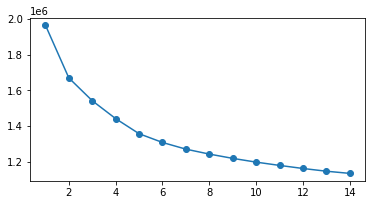

In [38]:
plt.figure(figsize=(6,3))

plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

plt.show()

###using silhoutte method

# clustering

In [56]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,n_init=15)
kmeans.fit(df1_kimp1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [57]:
labels=pd.DataFrame(kmeans.labels_)
labels[0].value_counts()

1    104580
0     58442
2     56035
Name: 0, dtype: int64

In [0]:
df1_kimp['kmeans']=labels

In [59]:
df1_kimp.head()

Trip_Distance  Life_Style_Index  ...  Cancellation_Last_1Month_8  kmeans
0      -1.465804         -1.796714  ...                           0       1
1      -0.575863         -0.093541  ...                           0       0
2      -0.101097         -0.017542  ...                           0       0
3       0.682207         -0.017542  ...                           0       2
4       0.423066          1.116674  ...                           0       2

[5 rows x 50 columns]

In [60]:
train=df1_kimp[df1_kimp['train/test']==1]
test=df1_kimp[df1_kimp['train/test']==0]
y=train['Surge_Pricing_Type']
x=train.drop(columns=['Surge_Pricing_Type',"train/test"])
x_test=test.drop(columns=["train/test",'Surge_Pricing_Type'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (131662, 48)
y_train shape is  (131662,)
x_test shape is  (87395, 48)


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

rf=RandomForestClassifier()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()
cbc=CatBoostClassifier()


models=[]


#models.append(('rf',rf))
#models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

results=[]
names=[]
count=0
output_result=pd.DataFrame(columns=['Description','accuracy-train'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    y_prob_train=model.predict_proba(x)[:,1]
    y_pred_test=model.predict(x_test)
    y_prob_test=model.predict_proba(x_test)[:,1]

    from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
    import sklearn.metrics as mt
    accuracy_train=accuracy_score(y,y_pred_train)
    #accuracy_test=accuracy_score(y_test,y_pred_test)
    #auc_train=roc_auc_score(y_train_sen,y_prob_train)
    #auc_test=roc_auc_score(y_test,y_prob_test)
    #recall_train=mt.recall_score(y_train_sen,y_pred_train)
    #recall_test=mt.recall_score(y_test,y_pred_test)
    #f1_train=mt.f1_score(y_train_sen,y_pred_train)
    #f1_test=mt.f1_score(y_test,y_pred_test)
    #conf_train=confusion_matrix(y_train_sen,y_pred_train)
    #conf_test=confusion_matrix(y_test,y_pred_test)
    #classf_train=classification_report(y_train_sen,y_pred_train)
    #classf_test=classification_report(y_test,y_pred_test)
    print(name.center(70,'*'))
    print('accuracy of base model-train  :  ', accuracy_train)
    #print('accuracy of base model-test :  ', accuracy_test)
    #print('AUC of base model-train  :  ', auc_train)
    #print('AUC of base model-test  :  ', auc_test)
    print()
    #print('confusion matrix-train \n',conf_train)
    print()
    #print('confusion matrix-test \n',conf_test)
    #print()
    #print('classification report-train \n',classf_train)
    #print('classification report-test \n',classf_test)

    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'accuracy-train':accuracy_train },index=[count])],axis=0)
    
print(output_result)

********************************gboost********************************
accuracy of base model-train  :   0.7008552201850192


Learning rate set to 0.101488
0:	learn: 1.0368354	total: 75.3ms	remaining: 1m 15s
1:	learn: 0.9883086	total: 151ms	remaining: 1m 15s
2:	learn: 0.9499475	total: 242ms	remaining: 1m 20s
3:	learn: 0.9191040	total: 321ms	remaining: 1m 20s
4:	learn: 0.8943086	total: 398ms	remaining: 1m 19s
5:	learn: 0.8733669	total: 477ms	remaining: 1m 18s
6:	learn: 0.8559237	total: 565ms	remaining: 1m 20s
7:	learn: 0.8414413	total: 640ms	remaining: 1m 19s
8:	learn: 0.8299883	total: 719ms	remaining: 1m 19s
9:	learn: 0.8193734	total: 798ms	remaining: 1m 19s
10:	learn: 0.8111452	total: 877ms	remaining: 1m 18s
11:	learn: 0.8033265	total: 954ms	remaining: 1m 18s
12:	learn: 0.7970500	total: 1.04s	remaining: 1m 18s
13:	learn: 0.7915703	total: 1.12s	remaining: 1m 19s
14:	learn: 0.7864625	total: 1.22s	remaining: 1m 19s
15:	learn: 0.7817435	total: 1.3s	remaining: 1m 19s
16:	learn: 0.7778082	t

In [0]:

id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=gboost.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/gboost_km1.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=cbc.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/cbc_km1.csv')

#feature engineering

In [63]:
df1_kimp.head()

Trip_Distance  Life_Style_Index  ...  Cancellation_Last_1Month_8  kmeans
0      -1.465804         -1.796714  ...                           0       1
1      -0.575863         -0.093541  ...                           0       0
2      -0.101097         -0.017542  ...                           0       0
3       0.682207         -0.017542  ...                           0       2
4       0.423066          1.116674  ...                           0       2

[5 rows x 50 columns]

In [0]:
df_fe=df1_kimp.copy()

In [0]:
df_fe['var23']=df_fe['Var2']/df_fe['Var3']

In [69]:
train=df_fe[df_fe['train/test']==1]
test=df_fe[df_fe['train/test']==0]
y=train['Surge_Pricing_Type']
x=train.drop(columns=['Surge_Pricing_Type',"train/test"])
x_test=test.drop(columns=["train/test",'Surge_Pricing_Type'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (131662, 49)
y_train shape is  (131662,)
x_test shape is  (87395, 49)


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

rf=RandomForestClassifier()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()
cbc=CatBoostClassifier()


models=[]


#models.append(('rf',rf))
#models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

results=[]
names=[]
count=0
output_result=pd.DataFrame(columns=['Description','accuracy-train'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    y_prob_train=model.predict_proba(x)[:,1]
    y_pred_test=model.predict(x_test)
    y_prob_test=model.predict_proba(x_test)[:,1]

    from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
    import sklearn.metrics as mt
    accuracy_train=accuracy_score(y,y_pred_train)
    #accuracy_test=accuracy_score(y_test,y_pred_test)
    #auc_train=roc_auc_score(y_train_sen,y_prob_train)
    #auc_test=roc_auc_score(y_test,y_prob_test)
    #recall_train=mt.recall_score(y_train_sen,y_pred_train)
    #recall_test=mt.recall_score(y_test,y_pred_test)
    #f1_train=mt.f1_score(y_train_sen,y_pred_train)
    #f1_test=mt.f1_score(y_test,y_pred_test)
    #conf_train=confusion_matrix(y_train_sen,y_pred_train)
    #conf_test=confusion_matrix(y_test,y_pred_test)
    #classf_train=classification_report(y_train_sen,y_pred_train)
    #classf_test=classification_report(y_test,y_pred_test)
    print(name.center(70,'*'))
    print('accuracy of base model-train  :  ', accuracy_train)
    #print('accuracy of base model-test :  ', accuracy_test)
    #print('AUC of base model-train  :  ', auc_train)
    #print('AUC of base model-test  :  ', auc_test)
    print()
    #print('confusion matrix-train \n',conf_train)
    print()
    #print('confusion matrix-test \n',conf_test)
    #print()
    #print('classification report-train \n',classf_train)
    #print('classification report-test \n',classf_test)

    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'accuracy-train':accuracy_train },index=[count])],axis=0)
    
print(output_result)

********************************gboost********************************
accuracy of base model-train  :   0.7007185064787106


Learning rate set to 0.101488
0:	learn: 1.0362357	total: 79.7ms	remaining: 1m 19s
1:	learn: 0.9880882	total: 158ms	remaining: 1m 18s
2:	learn: 0.9499967	total: 238ms	remaining: 1m 19s
3:	learn: 0.9190103	total: 320ms	remaining: 1m 19s
4:	learn: 0.8939281	total: 417ms	remaining: 1m 22s
5:	learn: 0.8730789	total: 496ms	remaining: 1m 22s
6:	learn: 0.8559578	total: 578ms	remaining: 1m 21s
7:	learn: 0.8414935	total: 657ms	remaining: 1m 21s
8:	learn: 0.8290999	total: 734ms	remaining: 1m 20s
9:	learn: 0.8187461	total: 817ms	remaining: 1m 20s
10:	learn: 0.8100542	total: 899ms	remaining: 1m 20s
11:	learn: 0.8024403	total: 986ms	remaining: 1m 21s
12:	learn: 0.7958508	total: 1.07s	remaining: 1m 21s
13:	learn: 0.7902186	total: 1.16s	remaining: 1m 21s
14:	learn: 0.7852986	total: 1.24s	remaining: 1m 21s
15:	learn: 0.7812374	total: 1.32s	remaining: 1m 21s
16:	learn: 0.7770750	

In [0]:

id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=gboost.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/gboost_kmfe.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=cbc.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/cbc_kmfe.csv')

#Isolation forrest

In [0]:
df_iso=df1_kimp.copy()

In [0]:
df_iso[['Trip_Distance','Life_Style_Index','Customer_Rating','Var1','Var2','Var3']]=ss.fit_transform(df_iso[['Trip_Distance','Life_Style_Index','Customer_Rating','Var1','Var2','Var3']])

In [74]:
df_iso.head()

Trip_Distance  Life_Style_Index  ...  Cancellation_Last_1Month_8  kmeans
0      -1.465804         -1.796714  ...                           0       1
1      -0.575863         -0.093541  ...                           0       0
2      -0.101097         -0.017542  ...                           0       0
3       0.682207         -0.017542  ...                           0       2
4       0.423066          1.116674  ...                           0       2

[5 rows x 50 columns]

In [0]:
df_try=df_iso.copy()

In [0]:
df_try1=df_try.drop(columns=['Surge_Pricing_Type','train/test'],axis=1)

In [77]:
from sklearn.ensemble import IsolationForest
isf = IsolationForest()

isf.fit(df_try1)

df_try['abn_value']=isf.score_samples(df_try1)
df_try['pos_out']=isf.predict(df_try1)
df_try.head()

Trip_Distance  Life_Style_Index  Customer_Rating  ...  kmeans  abn_value  pos_out
0      -1.465804         -1.796714         1.076720  ...       1  -0.428026        1
1      -0.575863         -0.093541         0.612954  ...       0  -0.381006        1
2      -0.101097         -0.017542         0.665191  ...       0  -0.469066        1
3       0.682207         -0.017542         0.616776  ...       2  -0.386823        1
4       0.423066          1.116674         0.564539  ...       2  -0.433634        1

[5 rows x 52 columns]

In [78]:
train=df_try[df_try['train/test']==1]
test=df_try[df_try['train/test']==0]
y=train['Surge_Pricing_Type']
x=train.drop(columns=['Surge_Pricing_Type',"train/test"])
x_test=test.drop(columns=["train/test",'Surge_Pricing_Type'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (131662, 50)
y_train shape is  (131662,)
x_test shape is  (87395, 50)


In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

rf=RandomForestClassifier()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()
cbc=CatBoostClassifier()


models=[]


#models.append(('rf',rf))
#models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

results=[]
names=[]
count=0
output_result=pd.DataFrame(columns=['Description','accuracy-train'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    y_prob_train=model.predict_proba(x)[:,1]
    y_pred_test=model.predict(x_test)
    y_prob_test=model.predict_proba(x_test)[:,1]

    from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
    import sklearn.metrics as mt
    accuracy_train=accuracy_score(y,y_pred_train)
    #accuracy_test=accuracy_score(y_test,y_pred_test)
    #auc_train=roc_auc_score(y_train_sen,y_prob_train)
    #auc_test=roc_auc_score(y_test,y_prob_test)
    #recall_train=mt.recall_score(y_train_sen,y_pred_train)
    #recall_test=mt.recall_score(y_test,y_pred_test)
    #f1_train=mt.f1_score(y_train_sen,y_pred_train)
    #f1_test=mt.f1_score(y_test,y_pred_test)
    #conf_train=confusion_matrix(y_train_sen,y_pred_train)
    #conf_test=confusion_matrix(y_test,y_pred_test)
    #classf_train=classification_report(y_train_sen,y_pred_train)
    #classf_test=classification_report(y_test,y_pred_test)
    print(name.center(70,'*'))
    print('accuracy of base model-train  :  ', accuracy_train)
    #print('accuracy of base model-test :  ', accuracy_test)
    #print('AUC of base model-train  :  ', auc_train)
    #print('AUC of base model-test  :  ', auc_test)
    print()
    #print('confusion matrix-train \n',conf_train)
    print()
    #print('confusion matrix-test \n',conf_test)
    #print()
    #print('classification report-train \n',classf_train)
    #print('classification report-test \n',classf_test)

    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'accuracy-train':accuracy_train },index=[count])],axis=0)
    
print(output_result)

********************************gboost********************************
accuracy of base model-train  :   0.7009007914204554


Learning rate set to 0.101488
0:	learn: 1.0362357	total: 75.9ms	remaining: 1m 15s
1:	learn: 0.9881636	total: 154ms	remaining: 1m 16s
2:	learn: 0.9507186	total: 231ms	remaining: 1m 16s
3:	learn: 0.9196093	total: 311ms	remaining: 1m 17s
4:	learn: 0.8943080	total: 388ms	remaining: 1m 17s
5:	learn: 0.8734196	total: 466ms	remaining: 1m 17s
6:	learn: 0.8561098	total: 550ms	remaining: 1m 18s
7:	learn: 0.8416309	total: 627ms	remaining: 1m 17s
8:	learn: 0.8300504	total: 732ms	remaining: 1m 20s
9:	learn: 0.8197371	total: 815ms	remaining: 1m 20s
10:	learn: 0.8109788	total: 897ms	remaining: 1m 20s
11:	learn: 0.8031380	total: 977ms	remaining: 1m 20s
12:	learn: 0.7965713	total: 1.06s	remaining: 1m 20s
13:	learn: 0.7903483	total: 1.14s	remaining: 1m 20s
14:	learn: 0.7852110	total: 1.22s	remaining: 1m 20s
15:	learn: 0.7810037	total: 1.3s	remaining: 1m 20s
16:	learn: 0.7764727	t

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=gboost.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/gboost_kmis2.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=cbc.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/cbc_kmis2.csv')

#removing "outlier column" and keeping abnormal_value from isolation forrest

In [82]:
df_try=df_try.drop(columns=['pos_out'],axis=1)
df_try.head()

Trip_Distance  Life_Style_Index  ...  kmeans  abn_value
0      -1.465804         -1.796714  ...       1  -0.428026
1      -0.575863         -0.093541  ...       0  -0.381006
2      -0.101097         -0.017542  ...       0  -0.469066
3       0.682207         -0.017542  ...       2  -0.386823
4       0.423066          1.116674  ...       2  -0.433634

[5 rows x 51 columns]

In [83]:
train=df_try[df_try['train/test']==1]
test=df_try[df_try['train/test']==0]
y=train['Surge_Pricing_Type']
x=train.drop(columns=['Surge_Pricing_Type',"train/test"])
x_test=test.drop(columns=["train/test",'Surge_Pricing_Type'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (131662, 49)
y_train shape is  (131662,)
x_test shape is  (87395, 49)


In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

rf=RandomForestClassifier()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()
cbc=CatBoostClassifier()


models=[]


#models.append(('rf',rf))
#models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

results=[]
names=[]
count=0
output_result=pd.DataFrame(columns=['Description','accuracy-train'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    y_prob_train=model.predict_proba(x)[:,1]
    y_pred_test=model.predict(x_test)
    y_prob_test=model.predict_proba(x_test)[:,1]

    from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
    import sklearn.metrics as mt
    accuracy_train=accuracy_score(y,y_pred_train)
    #accuracy_test=accuracy_score(y_test,y_pred_test)
    #auc_train=roc_auc_score(y_train_sen,y_prob_train)
    #auc_test=roc_auc_score(y_test,y_prob_test)
    #recall_train=mt.recall_score(y_train_sen,y_pred_train)
    #recall_test=mt.recall_score(y_test,y_pred_test)
    #f1_train=mt.f1_score(y_train_sen,y_pred_train)
    #f1_test=mt.f1_score(y_test,y_pred_test)
    #conf_train=confusion_matrix(y_train_sen,y_pred_train)
    #conf_test=confusion_matrix(y_test,y_pred_test)
    #classf_train=classification_report(y_train_sen,y_pred_train)
    #classf_test=classification_report(y_test,y_pred_test)
    print(name.center(70,'*'))
    print('accuracy of base model-train  :  ', accuracy_train)
    #print('accuracy of base model-test :  ', accuracy_test)
    #print('AUC of base model-train  :  ', auc_train)
    #print('AUC of base model-test  :  ', auc_test)
    print()
    #print('confusion matrix-train \n',conf_train)
    print()
    #print('confusion matrix-test \n',conf_test)
    #print()
    #print('classification report-train \n',classf_train)
    #print('classification report-test \n',classf_test)

    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'accuracy-train':accuracy_train },index=[count])],axis=0)
    
print(output_result)

********************************gboost********************************
accuracy of base model-train  :   0.7009007914204554


Learning rate set to 0.101488
0:	learn: 1.0362357	total: 78.2ms	remaining: 1m 18s
1:	learn: 0.9880882	total: 160ms	remaining: 1m 19s
2:	learn: 0.9499967	total: 238ms	remaining: 1m 19s
3:	learn: 0.9190103	total: 317ms	remaining: 1m 18s
4:	learn: 0.8939281	total: 400ms	remaining: 1m 19s
5:	learn: 0.8730789	total: 479ms	remaining: 1m 19s
6:	learn: 0.8559578	total: 558ms	remaining: 1m 19s
7:	learn: 0.8414935	total: 638ms	remaining: 1m 19s
8:	learn: 0.8290999	total: 716ms	remaining: 1m 18s
9:	learn: 0.8187461	total: 795ms	remaining: 1m 18s
10:	learn: 0.8096445	total: 880ms	remaining: 1m 19s
11:	learn: 0.8017198	total: 963ms	remaining: 1m 19s
12:	learn: 0.7952520	total: 1.07s	remaining: 1m 20s
13:	learn: 0.7893267	total: 1.15s	remaining: 1m 21s
14:	learn: 0.7843781	total: 1.23s	remaining: 1m 20s
15:	learn: 0.7799018	total: 1.31s	remaining: 1m 20s
16:	learn: 0.7762980	

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=gboost.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/gboost_kmis1.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mobility Analytics/test_VsU9xXK.csv")
y_pred=cbc.predict(x_test)
r1=id['Trip_ID']
r2=pd.DataFrame(y_pred,columns=['Surge_Pricing_Type'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/Mobility Analytics/results/cbc_kmis1.csv')